In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


# 1. The association of LTC and its gradient with functional connectivity

## a) Functional connectivity matrix

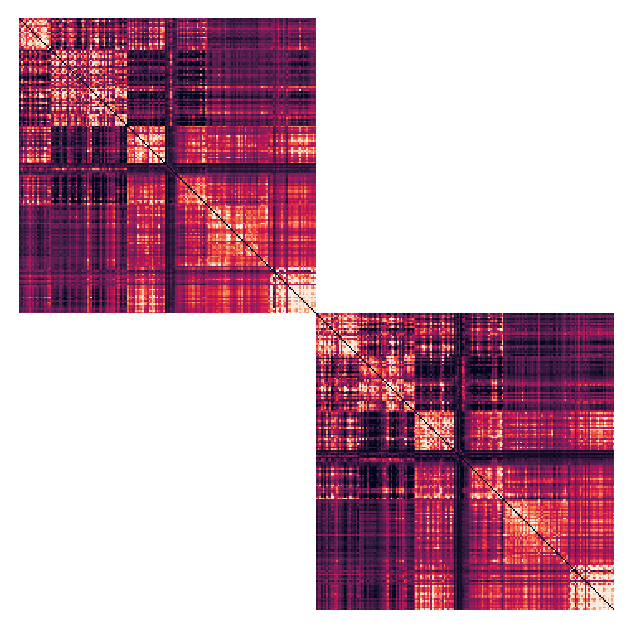

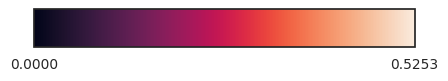

In [2]:
fc = matrices.ConnectivityMatrix('functional', exc_regions='adysgranular', exc_contra=True)
fc.plot()

## b) LTC in association with FC probability

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Optimization terminated successfully.
         Current function value: 0.489084
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                 0.02571
Time:                        13:42:12   Log-Likelihood:                -15671.
converged:                       True   LL-Null:                       -16084.
Covariance Type:            nonrobust   LLR p-value:                7.062e-182
                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------

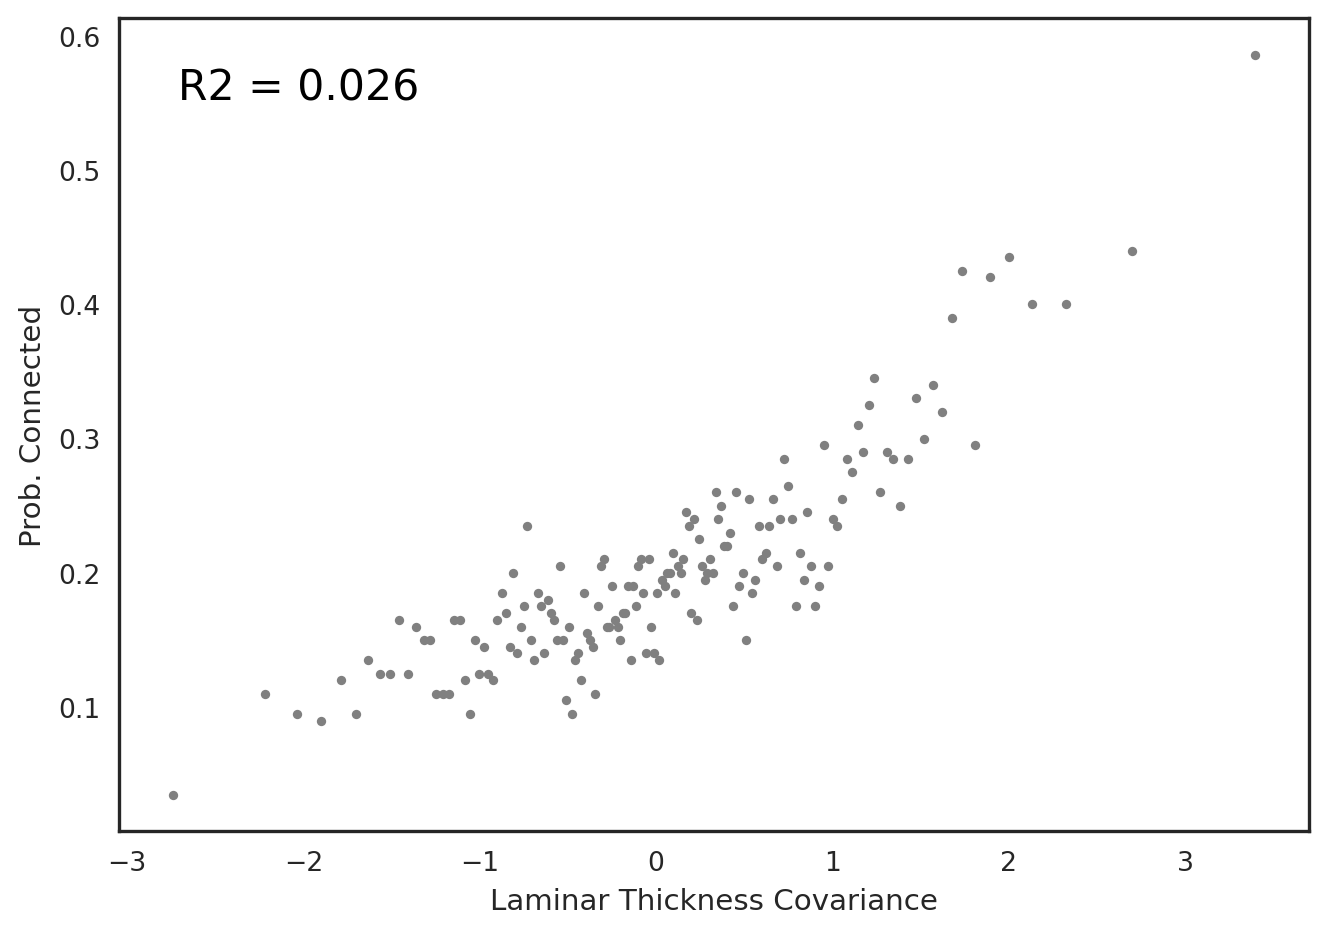

In [3]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400')
models, pvals, null_models = fc.binarized_association(ltc, spin_test=True, n_perm=1000)
print(pvals)

## c) LTC in associaiton with FC strength

In [4]:
fc_thr = matrices.ConnectivityMatrix('functional', threshold=True, exc_contra=True)

Pearson correlation with Functional connectivity
Coef: 0.2627146074299715; p-value (spin): 0.0


(0.2627146074299715, 0.0)

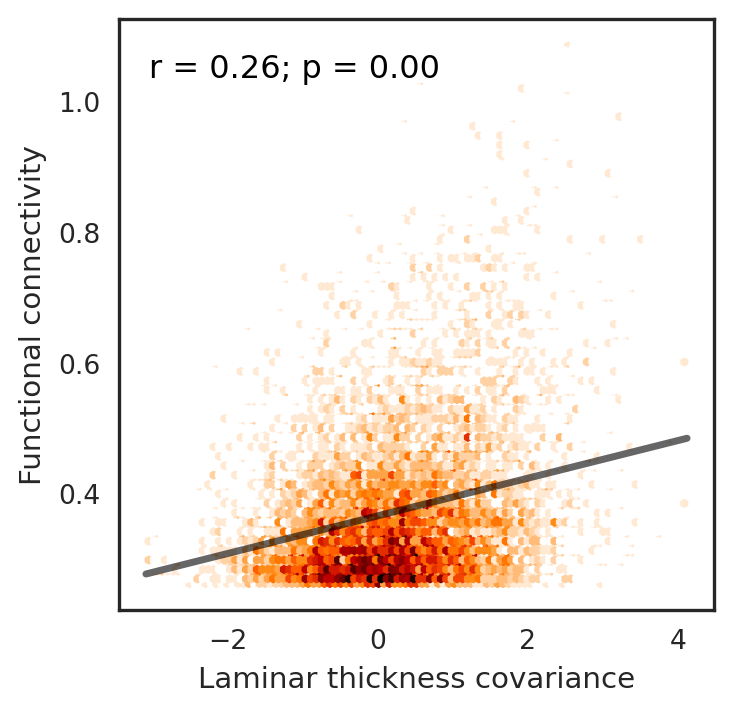

In [5]:
ltc.correlate_edge_wise(fc_thr, n_perm=1000, axis_off=False, figsize=(4, 4))

## d) Geodesic distance in association with FC probability

Loading the matrix from /home/asaberi/laminar_organization/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz
Optimization terminated successfully.
         Current function value: 0.468926
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                 0.06587
Time:                        13:44:38   Log-Likelihood:                -15025.
converged:                       True   LL-Null:                       -16084.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

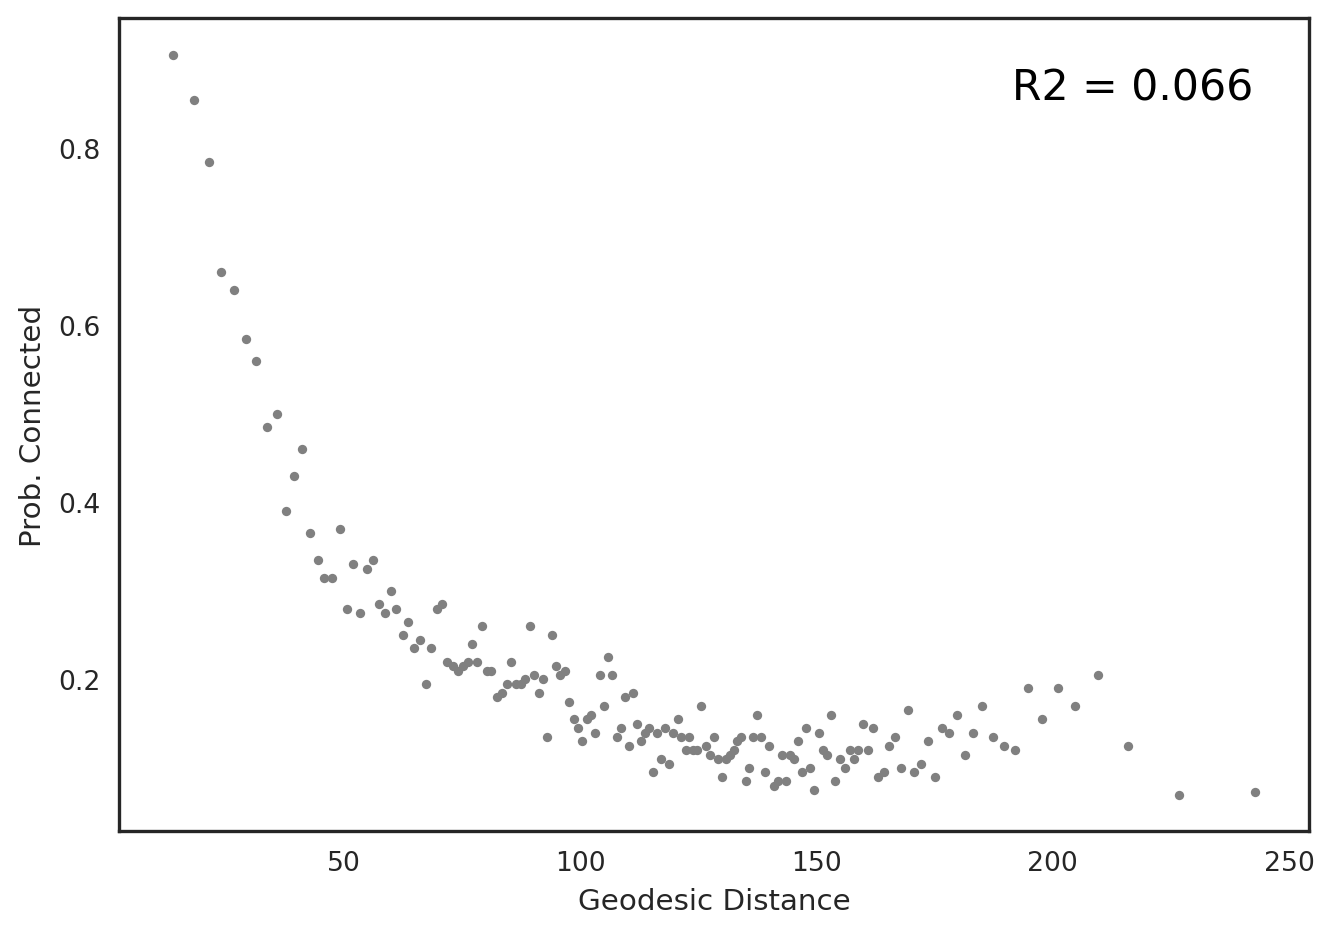

In [6]:
gd = matrices.DistanceMatrix('schaefer400')
models, pvals, null_models = fc.binarized_association(gd, spin_test=True, n_perm=1000)
print(pvals)

## e) Geodesic distance in association with FC strength

R2 = 0.11730392536936796, p = 0.033


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


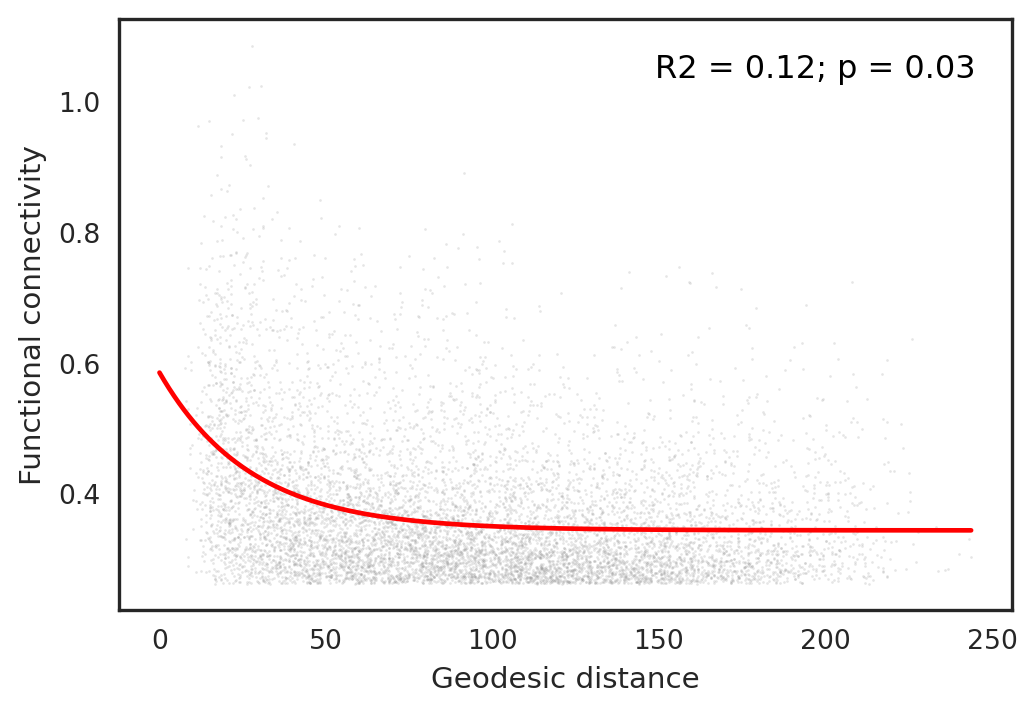

In [7]:
r2, p = gd.regress_out(fc_thr, spin_test=True, return_r2=True)
print(f'R2 = {r2}, p = {p}')

## f) LTC in association with long-range FC probability

Loading the matrix from /home/asaberi/laminar_organization/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz
Optimization terminated successfully.
         Current function value: 0.499608
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                24597
Model:                          Logit   Df Residuals:                    24595
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Nov 2022   Pseudo R-squ.:                0.001768
Time:                        13:48:46   Log-Likelihood:                -12289.
converged:                       True   LL-Null:                       -12311.
Covariance Type:            nonrobust   LLR p-value:                 4.200e-11
                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------

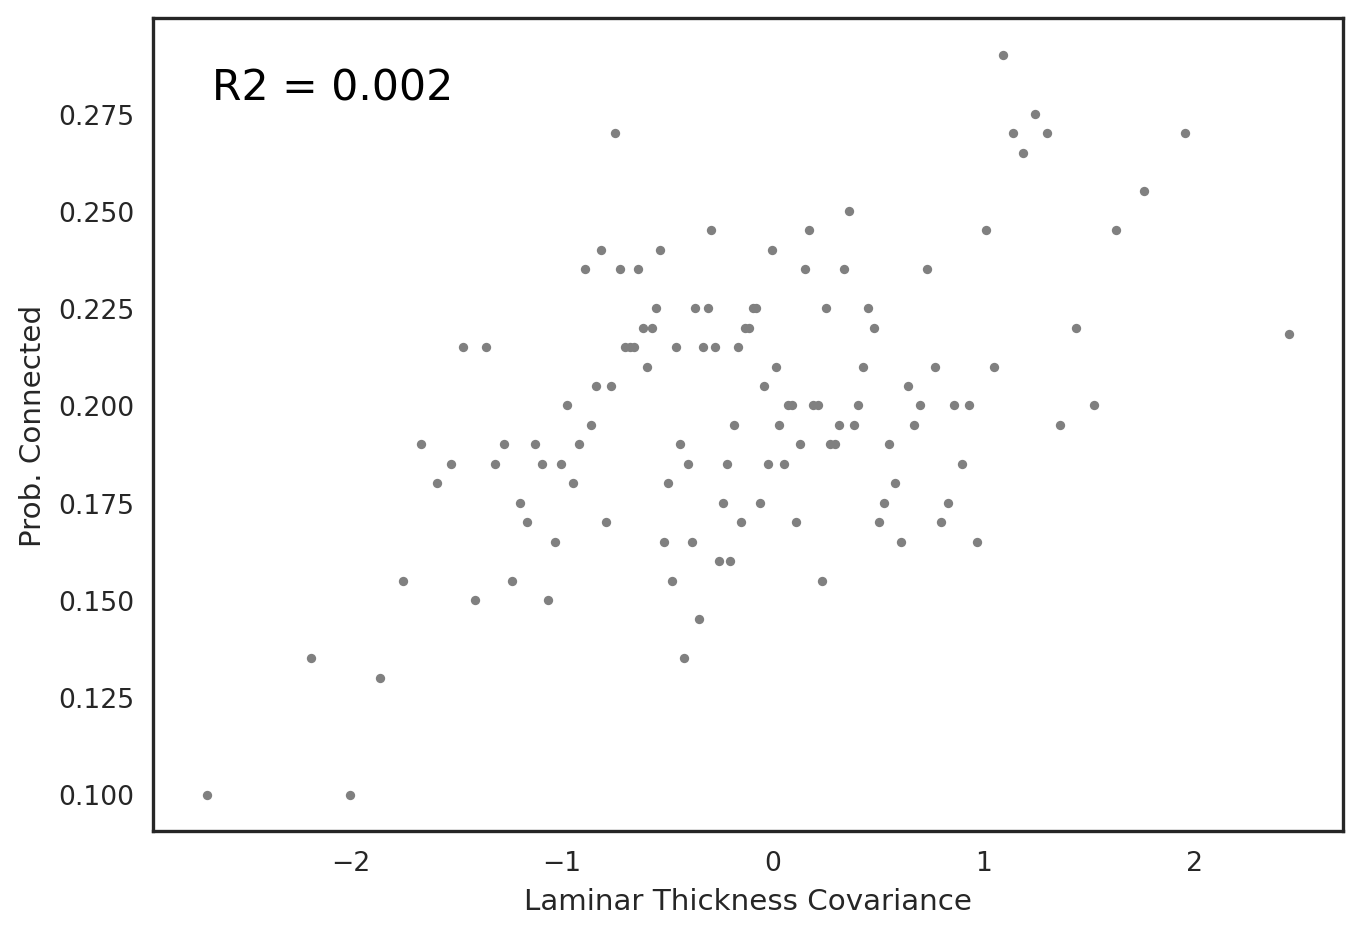

In [8]:
fc_long_range = matrices.ConnectivityMatrix('functional', exc_regions='adysgranular', exc_contra=True, long_range=True)
models, pvals, null_models = fc_long_range.binarized_association(ltc, spin_test=True, n_perm=1000)
print(pvals)

## g) LTC in association with long-range FC strength

In [9]:
fc_thr_long_range = matrices.ConnectivityMatrix('functional', threshold=True, exc_contra=True, long_range=True)

Loading the matrix from /home/asaberi/laminar_organization/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz


Pearson correlation with Functional connectivity
Coef: 0.12539926164852572; p-value (spin): 0.021


(0.12539926164852572, 0.021)

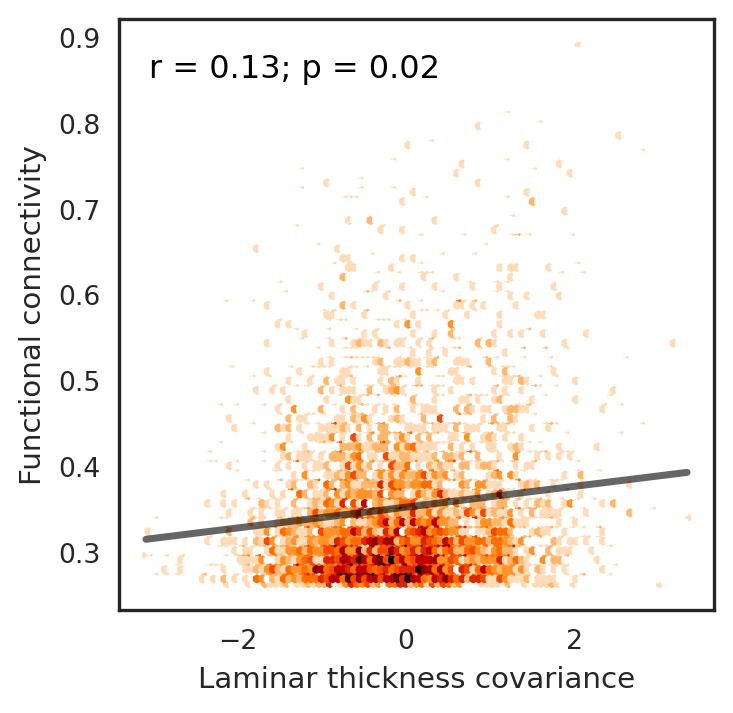

In [10]:
ltc.correlate_edge_wise(fc_thr_long_range, n_perm=1000, axis_off=False, figsize=(4, 4))